<a href="https://colab.research.google.com/github/23Aditya/23Aditya/blob/main/Prophet_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14

In [ ]:
!pip install fbprophet

In [ ]:
!pip install neuralprophet[live]

In [4]:
import pandas as pd
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

# plotting
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [5]:
# loading the dataset
df = pd.read_csv('/content/Final_pocket_data.csv')
print(f'The dataset contains {len(df)} observations.')

The dataset contains 89 observations.


In [6]:
df.rename(columns = {'DATE':'ds', 'Attrition':'y'}, inplace = True)

In [7]:
df = df.drop(['Unnamed: 0' , 'New_BU_after_RE_org' , 'Facility_International_Region' , 'Job_Level'], axis=1)

In [8]:
print(f'{len(df)} Observations.')
df.head()

89 Observations.


,ds,y
0,2015-03-01,0.000000
1,2015-04-01,0.004425
2,2015-05-01,0.002179
3,2015-06-01,0.001992
4,2015-07-01,0.000000


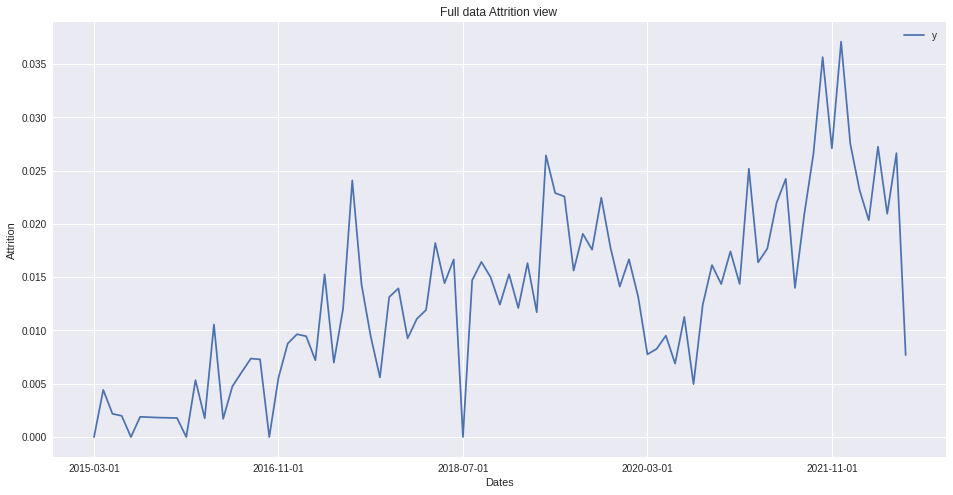

In [9]:
df.plot(x='ds', 
        y='y', 
        kind= 'line', 
        xlabel= "Dates", 
        ylabel="Attrition",
        title='Full data Attrition view '
        );

In [10]:
# getting the train/test split

test_length = 43            # If we r taking the test data from 2019-01-01
# test_length = 31              # If we r taking the test data from 2020-01-01
# test_length = 19                # If we r taking the test data from 2021-01-01

df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

In [11]:
print(f'{len(df_test)} observations.')
df_test

43 observations.


,ds,y
46,2019-01-01,0.012112
47,2019-02-01,0.016320
48,2019-03-01,0.011713
49,2019-04-01,0.026432
50,2019-05-01,0.022895
51,2019-06-01,0.022578
52,2019-07-01,0.015625
53,2019-08-01,0.019074
54,2019-09-01,0.017579
55,2019-10-01,0.022464


# With Prophet

In [12]:
prophet_model = Prophet()
prophet_model.fit(df_test)
future_df = prophet_model.make_future_dataframe(periods=test_length)
preds_df_1 = prophet_model.predict(future_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = prophet_model.make_future_dataframe(periods=12,freq='M')
forecast = prophet_model.predict(future)

In [14]:
df = forecast

In [15]:
df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.013187,0.007343,0.020698,0.013187,0.013187,0.000952,0.000952,0.000952,0.000952,0.000952,0.000952,0.0,0.0,0.0,0.014138
1,2019-02-01,0.013420,0.006138,0.020577,0.013420,0.013420,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.0,0.0,0.0,0.013716
2,2019-03-01,0.013631,0.002951,0.016776,0.013631,0.013631,-0.003687,-0.003687,-0.003687,-0.003687,-0.003687,-0.003687,0.0,0.0,0.0,0.009944
3,2019-04-01,0.013864,0.014200,0.027585,0.013864,0.013864,0.007032,0.007032,0.007032,0.007032,0.007032,0.007032,0.0,0.0,0.0,0.020897
4,2019-05-01,0.014090,0.008063,0.021194,0.014090,0.014090,0.000466,0.000466,0.000466,0.000466,0.000466,0.000466,0.0,0.0,0.0,0.014556


In [16]:
df.rename(columns = {'yhat':'y'}, inplace = True)

In [17]:
import plotly.express as px


fig = px.line(df, x="ds", y="y", title='Forcasting of 1 Year')
fig.add_scatter(x=df_test.ds, y=df_test.y, name='actual', mode='lines')
fig.show()